In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def rosenbrock_2d(x):
    """
    Función de Rosenbrock en 2 dimensiones.
    Parámetros:
        x: array-like de tamaño 2 [x1, x2].
    Retorna:
        Valor de la función.
    """
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (x1 - 1)**2

In [3]:
def rosenbrock_2d_grad(x):
    """
    Gradiente de la función de Rosenbrock en 2 dimensiones.
    Parámetros:
        x: array-like de tamaño 2 [x1, x2].
    Retorna:
        Array con las derivadas parciales respecto a x1 y x2.
    """
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

In [4]:
def gradient_descent_2d(f, grad_f, x0, lr=0.001, max_iter=10000, tolerance=1e-6):
    """
    Realiza el descenso por gradiente en 2D.
    Parámetros:
        f: Función objetivo.
        grad_f: Gradiente de la función.
        x0: Punto inicial como array [x1, x2].
        lr: Tasa de aprendizaje.
        max_iter: Máximo de iteraciones.
        tolerance: Tolerancia para criterio de convergencia.
    Retorna:
        Array de puntos visitados durante el descenso.
    """
    path = [x0]
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - lr * grad
        path.append(x_new)
        # Criterio de convergencia
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Convergencia alcanzada en la iteración {i+1}")
            break
        x = x_new
    return np.array(path)


In [9]:
def plot_rosenbrock_2d_with_min(path, min_point):
    fig, ax = plt.subplots(figsize=(8, 6))
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock_2d([X, Y])

    # Contornos de la función
    contour = ax.contour(X, Y, Z, levels=50, cmap='viridis')
    fig.colorbar(contour, ax=ax)

    # Trayectoria
    path_x, path_y = path[:, 0], path[:, 1]
    ax.plot(path_x, path_y, 'r-', label='Trayectoria')
    ax.scatter(path_x, path_y, c='red', s=10, label='Puntos de la trayectoria')

    # Mínimo
    ax.scatter(*min_point, c='green', s=100, label='Mínimo', edgecolor='black')

    ax.set_title("Descenso por Gradiente - Rosenbrock (2D)")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    plt.savefig("rosenbrock_2d_with_min.png")
    plt.show()


In [10]:
def animate_rosenbrock_2d_with_min(path, min_point):
    fig, ax = plt.subplots(figsize=(6, 6))
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock_2d([X, Y])

    ax.contour(X, Y, Z, levels=50, cmap='viridis')
    path_x, path_y = path[:, 0], path[:, 1]
    point, = ax.plot([], [], 'ro')
    line, = ax.plot([], [], 'r-', alpha=0.6)

    # Mínimo
    ax.scatter(*min_point, c='green', s=100, label='Mínimo', edgecolor='black')
    ax.legend()

    def init():
        point.set_data([], [])
        line.set_data([], [])
        return point, line

    def update(frame):
        step = max(1, len(path) // 50)
        index = frame * step if frame * step < len(path) else len(path) - 1
        point.set_data([path_x[index]], [path_y[index]])
        line.set_data(path_x[:index + 1], path_y[:index + 1])
        return point, line

    total_frames = min(50, len(path))
    ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=100)
    ax.set_title("Descenso por Gradiente - Rosenbrock (2D)")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)
    return ani


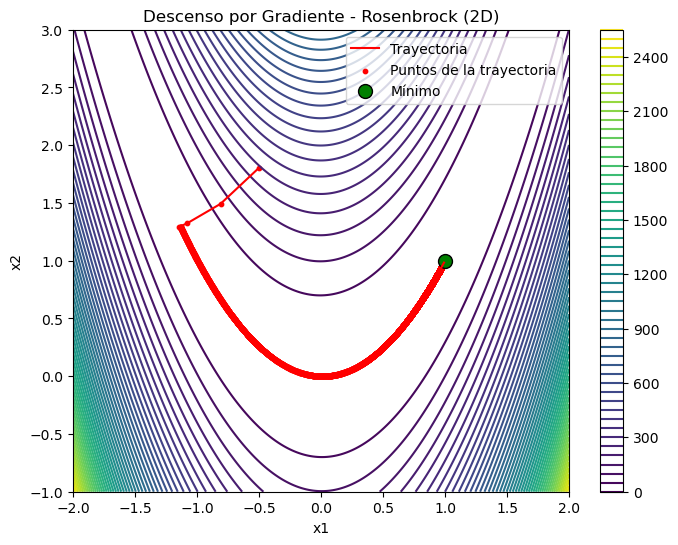

GIF guardado con éxito.


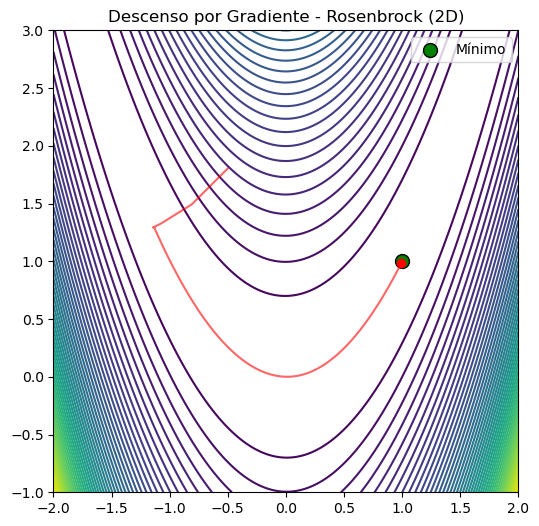

In [11]:
# Configuración inicial
np.random.seed(42)
x0 = np.random.uniform(-2, 2, 2)
min_point = np.array([1, 1])  # Mínimo conocido en 2D

# Generar trayectoria
path_rosenbrock_2d = gradient_descent_2d(
    rosenbrock_2d, rosenbrock_2d_grad, x0, lr=0.001, max_iter=10000
)

# Generar y mostrar gráfica estática
plot_rosenbrock_2d_with_min(path_rosenbrock_2d, min_point)

# Generar y guardar animación
ani_2d = animate_rosenbrock_2d_with_min(path_rosenbrock_2d, min_point)
#ani_2d.save("rosenbrock_2d_with_min.gif", writer="pillow", fps=10) 

try:
    ani_2d.save("rosenbrock_2d_with_min.gif", writer="pillow", fps=10)
    print("GIF guardado con éxito.")
except Exception as e:
    print("Error al guardar GIF:", e)


## Rosenbrock 3D

In [13]:
def rosenbrock_3d(x):
    """
    Función de Rosenbrock en 3 dimensiones.
    Parámetros:
        x: array-like de tamaño 3 [x1, x2, x3].
    Retorna:
        Valor de la función.
    """
    x1, x2, x3 = x
    return (
        100 * (x2 - x1**2)**2 + (x1 - 1)**2 +
        100 * (x3 - x2**2)**2 + (x2 - 1)**2
    )


In [14]:
def rosenbrock_3d_grad(x):
    """
    Gradiente de la función de Rosenbrock en 3 dimensiones.
    Parámetros:
        x: array-like de tamaño 3 [x1, x2, x3].
    Retorna:
        Array con las derivadas parciales respecto a x1, x2 y x3.
    """
    x1, x2, x3 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = -400 * x2 * (x3 - x2**2) - 2 * (1 - x2) + 200 * (x2 - x1**2)
    df_dx3 = 200 * (x3 - x2**2)
    return np.array([df_dx1, df_dx2, df_dx3])


In [22]:
def gradient_descent_3d(f, grad_f, x0, lr=0.0001, max_iter=20000, tolerance=1e-6):
    """
    Realiza el descenso por gradiente en 3D.
    Parámetros:
        f: Función objetivo.
        grad_f: Gradiente de la función.
        x0: Punto inicial como array [x1, x2, x3].
        lr: Tasa de aprendizaje.
        max_iter: Máximo de iteraciones.
        tolerance: Tolerancia para criterio de convergencia.
    Retorna:
        Array de puntos visitados durante el descenso.
    """
    path = [x0]
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - lr * grad
        path.append(x_new)
        # Criterio de convergencia
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Convergencia alcanzada en la iteración {i+1}")
            break
        x = x_new
    return np.array(path)


In [27]:
def plot_rosenbrock_3d_with_min(path, min_point):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Ajustando el ángulo de visión
    ax.view_init(elev=45, azim=60)  # Puedes ajustar estos valores

    # Superficie aproximada (manteniendo x3 constante)
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-1, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = np.ones_like(X1) * min_point[2]  # Mantener x3 constante
    Z = rosenbrock_3d([X1, X2, X3])

    # Superficie de la función con transparencia ajustada
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.4)

    # Trayectoria del descenso
    path_x1, path_x2, path_x3 = path[:, 0], path[:, 1], path[:, 2]
    path_z = rosenbrock_3d([path_x1, path_x2, path_x3])
    ax.plot(path_x1, path_x2, path_z, 'r-', lw=2, label='Trayectoria')
    ax.scatter(path_x1, path_x2, path_z, c='red', s=20, label='Puntos de la trayectoria')

    # Resaltar el mínimo conocido
    min_z = rosenbrock_3d(min_point)
    ax.scatter(min_point[0], min_point[1], min_z, c='green', s=100, label='Mínimo', edgecolor='black')

    # Configuración de la gráfica para una mejor visualización
    ax.set_title("Descenso por Gradiente - Rosenbrock (3D)")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")
    ax.legend()

    plt.savefig("rosenbrock_3d_with_min.png")
    plt.show()


In [24]:
def animate_rosenbrock_3d_with_min(path, min_point):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Ajustando el ángulo de visión
    ax.view_init(elev=45, azim=60)  # Puedes ajustar estos valores

    # Superficie aproximada (manteniendo x3 constante)
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-1, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = np.ones_like(X1) * min_point[2]
    Z = rosenbrock_3d([X1, X2, X3])

    # Superficie de la función con transparencia ajustada
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.4)

    # Trayectoria
    path_x1, path_x2, path_x3 = path[:, 0], path[:, 1], path[:, 2]
    path_z = rosenbrock_3d([path_x1, path_x2, path_x3])
    line, = ax.plot([], [], [], 'r-', lw=2)
    point, = ax.plot([], [], [], 'ro')

    # Mínimo
    min_z = rosenbrock_3d(min_point)
    ax.scatter(min_point[0], min_point[1], min_z, c='green', s=100, label='Mínimo', edgecolor='black')
    ax.legend()

    # Ajustar los límites de los ejes para mejor visualización
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)
    ax.set_zlim(0, np.max(path_z) + 10)

    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point

    def update(frame):
        step = max(1, len(path) // 50)
        index = frame * step if frame * step < len(path) else len(path) - 1
        line.set_data(path_x1[:index + 1], path_x2[:index + 1])
        line.set_3d_properties(path_z[:index + 1])
        point.set_data([path_x1[index]], [path_x2[index]])
        point.set_3d_properties(path_z[index])
        return line, point

    total_frames = min(50, len(path))
    ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=100)
    plt.close(fig)
    return ani


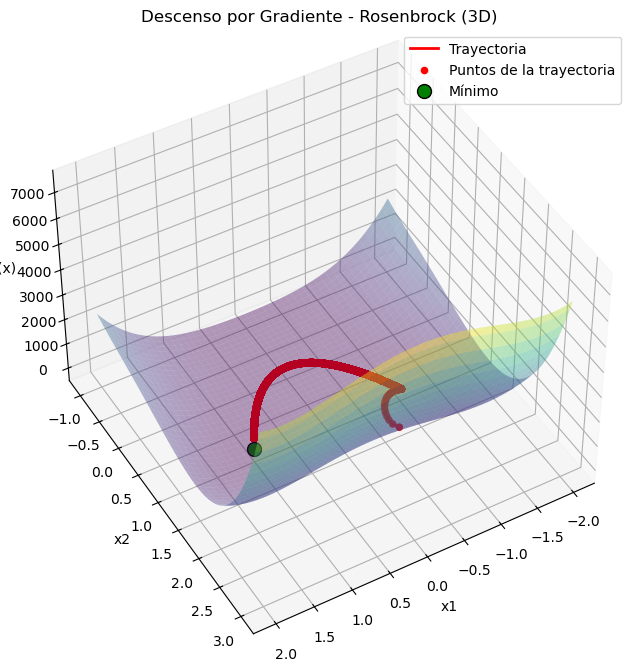

In [28]:
# Configuración inicial
np.random.seed(42)
x0_3d = np.random.uniform(-2, 2, 3)
min_point_3d = np.array([1, 1, 1])  # Mínimo conocido en 3D

# Generar trayectoria
path_rosenbrock_3d = gradient_descent_3d(
    rosenbrock_3d, rosenbrock_3d_grad, x0_3d, lr=0.0001, max_iter=40000
)

# Generar y mostrar gráfica estática
plot_rosenbrock_3d_with_min(path_rosenbrock_3d, min_point_3d)


In [26]:
# Generar y guardar animación
ani_3d = animate_rosenbrock_3d_with_min(path_rosenbrock_3d, min_point_3d)
try:
    ani_3d.save("rosenbrock_3d_with_min.gif", writer="pillow", fps=10)
    print("GIF guardado con éxito.")
except Exception as e:
    print("Error al guardar GIF:", e)


GIF guardado con éxito.
